<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture-10-batch_vs_stochastics_GD/Lecture_10_batch_vs_stochastics_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Gradient Descent Variants:**

The notebook begins with a theoretical overview of Gradient Descent, Batch Gradient Descent, and Stochastic Gradient Descent, explaining their core concepts and differences in weight update frequency.

# **Data Loading and Preprocessing:**

It demonstrates how to load a dataset ('Social_Network_Ads.csv') using pandas, select relevant features and the target variable, and then scale the features using StandardScaler from scikit-learn.

# **Batch Gradient Descent Implementation:**

A sequential Keras model is built with two dense layers and a sigmoid output layer. This model is compiled with binary crossentropy loss and trained using Batch Gradient Descent (batch_size = 400, which is the total number of samples in the dataset), and the training time and loss are plotted.

# **Stochastic Gradient Descent Implementation:**

Another sequential Keras model with the same architecture is created and compiled. This model is then trained using Stochastic Gradient Descent (batch_size = 1), and its training time and loss are also recorded and plotted for comparison.

# **Comparison of Training Times and Loss:**


The notebook implicitly allows for a comparison between Batch and Stochastic Gradient Descent by showing the training time and plotting the loss curves for each method. You can visually assess how the different update strategies affect convergence and training speed.

# **Gradient Descent**

Gradient descent is one of the most popular algorithms to perform optimization and by far the most commen way to optimize neural networks.

Gradient descent is a way to minimize an objective function(loss function) J(0) parameterized by a model's parameters 0ERd by updating the parameters in the opposite direction  of the gradient of the objective function 0J(0) w.r.t to the parameters.

The learning rate n determines the size of the steps we take to reach a local minimum.

In other words, we follow the direction of the slope of the surface created by the objective function downhill untill we reach a valley



# **Back propagation Algorithm (Gradient Descent)**

# **Batch Gradient Descent**

epoch = 10

for in range (10):

      # 50 values in y_hat
      y_hat = np.dot(x,w) + b  

          y = 50 values (which is actual values)
          
          # take y_hat and y to calculate loss
          y_hat, y ------>loss


          # then we update w,b updates using this rule
          w,b update / Wn = Wo - learningrat 2L/2W
          
          # then we print the loss of epochs
          
# summarization of batch gradient descent

we use dot product --> smart replacement  --> loops -->

vectorization--> faster loop


--> Total -> 10 times


            w,b update




#**Stochastic GD**

epoch ---> 10

for in range (10):

        shufling

    for i in range (x.shape[0])

              # take one random point
              # bias eliminate
            -> 1 randomly point

              # calculate y_hat
            -> y_hat -> farward

              # calculate loss
            -> loss

            w,b update ->Wn = Wo-learning-rate 2L/2W

    avg loss print -> for the epoch
            
            
             y_hat
             
frequency of weight update higher

#**summarization of stochastic GD**

for 10 epoch

for 50 rows --> 50x10 = 500

500 times weights would update



# **Stochastics GD**

epochs = 5

for i in range(epochs):

    for j in rang (x.shape[0]):

             select 1 row (random)

             predict ( using farward prop)

             calculate loss (using loss function ->mse)

             update weigts and bias using GD

                    Wn = Wo - l 2L/2W

    calculate avg loss for the epoch



---
**Stochastics**

50 points

        1 epochs

                50 times

                        w,b update

**batch GD**

50 points

dot product

y_hat = np.dot(x,w)+b

50 predictions

y = 50 actula outcomes

y and y_hat use calculate loss

loss is sigma 1 se 50 tak

on the basis of this loss we update weights and biases

if we have have 5 epochs

5 epochs

        5 times
              
              W,b update
            
        






  **Batch / Stochastic / Mini b**

  There are three variants of gradient descent, which differ in how much data we use to compute the gradient of the objective function.

  Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

Which is faster (given same no. of epochs)

batch gradient descent

In [34]:
# Import necessary libraries: numpy for numerical operations, pandas for data manipulation, and time for timing.
# %%

import numpy as np
import pandas as pd
import time

In [35]:
# Load the dataset from a CSV file located in Google Drive.

df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [36]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
# Select only the relevant columns: 'Age', 'EstimatedSalary', and 'Purchased'.

df = df[['Age', 'EstimatedSalary','Purchased']]

In [38]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [39]:
# Separate the features (Age, EstimatedSalary) into x and the target variable (Purchased) into y.

x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [40]:
# Import and apply StandardScaler to scale the features.
# This is important for many machine learning algorithms, especially those that use gradient descent.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
x_scaled.shape

(400, 2)

In [42]:
# It shows how to split the data into training and testing sets,
# which is a standard practice but not used in the subsequent model training in this notebook.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)



In [43]:
x_train.shape

(320, 2)

In [44]:
# Import necessary modules from TensorFlow and Keras to build a neural network.

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


# **Batch gradient descent**

In [45]:
# Create a Sequential model, which is a linear stack of layers.
# Add the first dense layer with 10 units, ReLU activation, and input dimension 2 (for Age and EstimatedSalary).
# Add a second dense layer with 10 units and ReLU activation.
# Add the output layer with 1 unit and sigmoid activation for binary classification.

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Print a summary of the model architecture, including the number of parameters.

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compile the model with binary crossentropy loss (suitable for binary classification) and accuracy as a metric.

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()

# Train the model using the scaled features and the target variable.

history = model.fit(x_scaled, y, batch_size=400, epochs=10 ,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2250 - loss: 0.7211 - val_accuracy: 0.4500 - val_loss: 0.7112
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.2500 - loss: 0.7142 - val_accuracy: 0.5000 - val_loss: 0.7066
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.2937 - loss: 0.7099 - val_accuracy: 0.5375 - val_loss: 0.7030
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.3469 - loss: 0.7066 - val_accuracy: 0.5625 - val_loss: 0.7001
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.3969 - loss: 0.7038 - val_accuracy: 0.5750 - val_loss: 0.6976
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4500 - loss: 0.7013 - val_accuracy: 0.5750 - val_loss: 0.6952
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4844 - loss: 0.6990 - val_accuracy: 0.6000 - val_loss: 0.6929
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5594 - loss: 0.6968 - val_accuracy: 0.6500 - val_loss: 0.

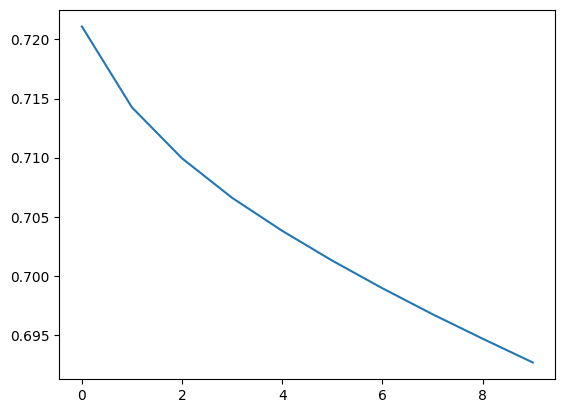

In [48]:
# Import matplotlib and plot the training loss over epochs to visualize the learning process.

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# **Stochastics gradient descent**

In [58]:
# Create a new Sequential model with the same architecture as before.

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:


# Compile the new model with the same loss and metrics.
# Train this model using the scaled features and the target variable.
# Set batch_size to 1 (Batch Gradient Descent, as there are 400 data points).
# Train for 10 epochs.
# Use 20% of the data for validation during training.

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled, y, batch_size=1, epochs=10 ,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6359 - loss: 0.6580 - val_accuracy: 0.9125 - val_loss: 0.5422
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.5433 - val_accuracy: 0.8500 - val_loss: 0.4765
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4115 - val_accuracy: 0.8000 - val_loss: 0.4280
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.3460 - val_accuracy: 0.8125 - val_loss: 0.3697
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8467 - loss: 0.3202 - val_accuracy: 0.8125 - val_loss: 0.3435
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8845 - loss: 0.2818 - val_accuracy: 0.9125 - val_loss: 0.3007
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8931 - loss: 0.2919 - val_accuracy: 0.8750 - val_loss: 0.3082
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8708 - loss: 0.2601 - val_accuracy: 0.

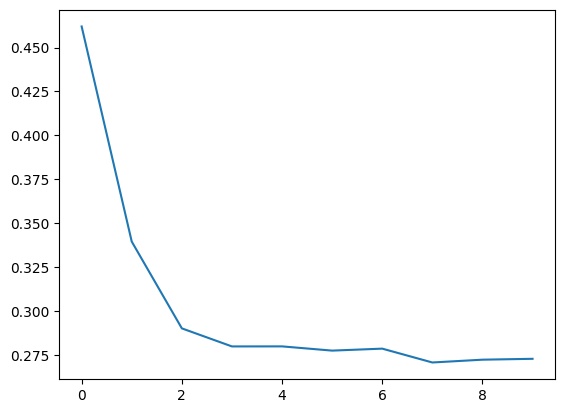

In [51]:
# Import matplotlib and plot the training loss over epochs for this model to compare with the previous one.

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# **Mini batch Gradient descent**

In [55]:
# Create a new Sequential model with the same architecture as before.

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
# Compile the new model with the same loss and metrics.
# Train this model using the scaled features and the target variable.

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled, y, batch_size=150, epochs=10 ,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.2829 - loss: 0.8154 - val_accuracy: 0.6375 - val_loss: 0.4941
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2855 - loss: 0.7865 - val_accuracy: 0.6625 - val_loss: 0.4963
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2777 - loss: 0.7797 - val_accuracy: 0.6750 - val_loss: 0.4946
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2919 - loss: 0.7562 - val_accuracy: 0.6750 - val_loss: 0.4959
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3100 - loss: 0.7431 - val_accuracy: 0.6750 - val_loss: 0.4956
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3025 - loss: 0.7299 - val_accuracy: 0.6750 - val_loss: 0.4949
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2996 - loss: 0.7303 - val_accuracy: 0.6875 - val_loss: 0.4946
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3217 - loss: 0.7142 - val_accuracy: 0.7125 - val_loss: 0.4960

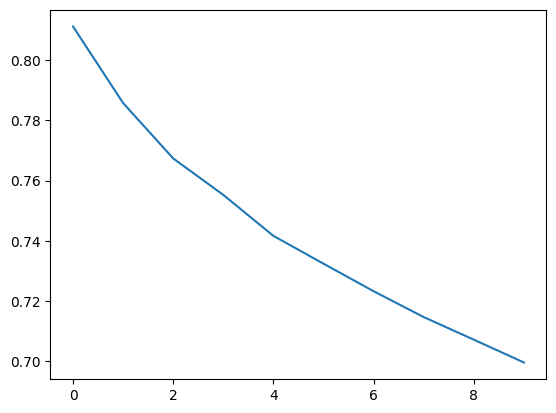

In [57]:
# Import matplotlib and plot the training loss over epochs for this model to compare with the previous one.

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])